# 2.5 Jakość podziału: entropia

Kolejną możliwością, jeśli chodzi o pomiar jakości podziału w tworzonym drzewie, jest entropia. W swoim założeniu mierzy ona ilość informacji niesionej przez daną wiadomość.

Jeśli prawdopodobieństwo wystąpienia danej wiadomości wynosi 1, czyli jest to zdarzenie pewne, to jego wartość entropii wynosi 0, ponieważ ten fakt nie wnosi żadnej niespodziewanej informacji.

### Gini vs entropia
Obydwie wartości, do przeprowadzenia wyliczeń, korzystają z wartości proporcji które są wartościami z przedziału [0, 1]. Możemy więc wyrysować jak kształtują się wyrazy, które sumujemy by je wyliczyć, ze względu na wartości tych proporcji.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({
    "p": np.linspace(0, 1, 1000)
})
df["gini"] = df["p"] * (1 - df["p"])
df["entropy"] = - df["p"] * np.log2(df["p"])

/home/maciej/deep/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='p'>

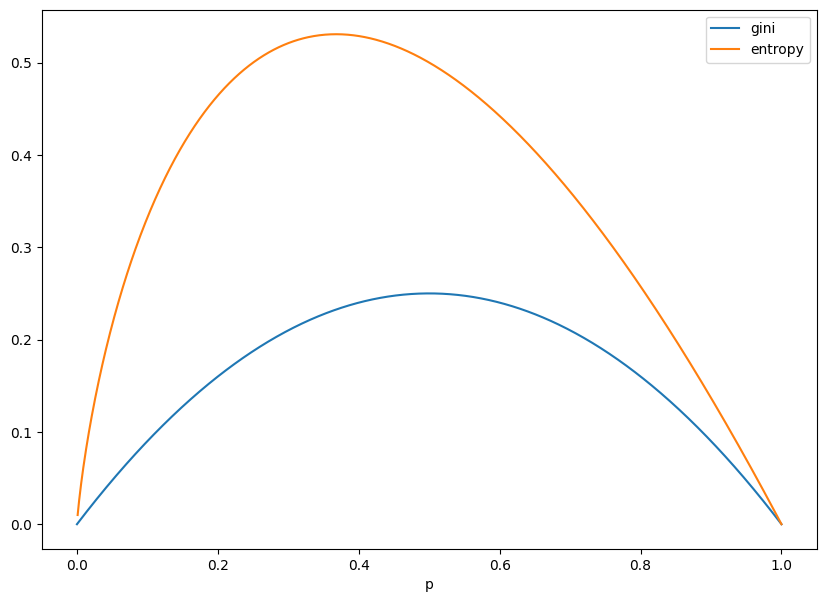

In [3]:
df.plot(x="p", figsize=(10, 7))